## **Training Yolov8 on custom Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Spliting dataset to train and test

In [ ]:
%ls /content/drive/MyDrive/
%cd /content/drive/MyDrive/FinalRSSstudio/project32024

'Colab Notebooks'/       'DMX prototype'/   FinalRSSstudio/  'Nne Nnua Ekpad'/
'DataCapture Exercise'/   doc/              Gallery/          RsStudioProject/
/content/drive/MyDrive/FinalRSSstudio/project32024


##  1. Install libraries

In [ ]:
# !python splityolo.py --imageDir Dee_images --outputDir trainTest --ratio .1 --txt

In [ ]:
# installing package to work with yolov8
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 11.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# Checking the size of images and displaying them
import numpy as np
import cv2
from ultralytics import YOLO

In [ ]:
import glob
from IPython.display import Image, display

##### YOLOV8 Installation:
We used to clone the repo or use torchhub to work with Yolov5. The recent YoloV8 has been released as pip package, so we don't need to clone any repo. This package alone installs ever dependency for yolov8.

The Pip install of the ultralytics package including all requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7.

YOLOV8 format:
The format for Yolov8 is same as Yolov5. The YOLO format, with one .txt file per image (if no objects in image, no .txt file is required). The *.txt file specifications are:

One row per object Each row is class x_center y_center width height format.

Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height. Class numbers are zero-indexed (start from 0).

In [ ]:
# to check and monitoring of NVIDIA GPU devices.
#!nvidia-smi

##  2. Path of information

In [ ]:
%cd /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/train

/content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/train


In [ ]:
# Image shape in Training
image = cv2.imread('0aebd78f-512791_5401513_Base_A62_Luftbild_2021_EPSG25832.png')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))

shape of the training image 128, 128


In [ ]:
# Image shape in validation
# image = cv2.imread('/content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/test/003b98ab-513107_5401148_Base_A62_Luftbild_2021_EPSG25832.png')
# height = np.size(image, 0)
# width = np.size(image, 1)
# print ("shape of the validation image {}, {}".format(height, width))

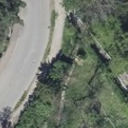

In [ ]:
#Test image plot
from IPython.display import Image
Image(filename='/content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/train/00217c64-511624_5401489_Base_A62_Luftbild_2021_EPSG25832.png', width=300)


### 2.1 Number of Classes

### 2.1 Train folder

In [ ]:
# I will write the contents of the cell to a file
# %%writefile /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/complete.yaml
%%writefile /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/complete.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest # dataset root dir
train: train # train images (relative to 'path')
val: val # val images (relative to 'path')
test: test # test images (optional)

# number of classes
nc: 2
# class names
#names: ['1']
names: ['Car','Truck']  # class names

Overwriting /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/complete.yaml


In [ ]:
%cd /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest

/content/drive/MyDrive/FinalRSSstudio/project32024/trainTest


In [ ]:
# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/complete.yaml", epochs=25, imgsz=128,cache=False)  # train the model

Ultralytics YOLOv8.2.39 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/complete.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/train.cache... 1996 images, 521 backgrounds, 35 corrupt: 100%|██████████| 1996/1996 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/train/067e1d72-511600_5404164_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2575]
train: WARNING ⚠️ /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/train/20f7b8da-511600_5402753_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2305]
train: WARNING ⚠️ /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/train/24f63abc-511600_5403069_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1467]
train: WARNING ⚠️ /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/train/25073526-511624_5402899_Base_A62_Luftbild_2021_EPSG25832.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3204]
train: WARNING ⚠️ /content/drive/MyDrive/FinalRSSstudio/proj

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/FinalRSSstudio/project32024/trainTest/val.cache... 511 images, 188 backgrounds, 0 corrupt: 100%|██████████| 511/511 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      2.023      1.685      1.099         30        128: 100%|██████████| 123/123 [14:05<00:00,  6.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [03:04<00:00, 11.55s/it]

                   all        511        842      0.311      0.526      0.376      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      1.961      1.388       1.08         28        128: 100%|██████████| 123/123 [10:36<00:00,  5.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:16<00:00,  4.77s/it]

                   all        511        842      0.113      0.133     0.0322     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.989      1.359       1.07         28        128: 100%|██████████| 123/123 [10:24<00:00,  5.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:15<00:00,  4.71s/it]

                   all        511        842      0.444      0.536      0.452      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.933      1.308      1.051         30        128: 100%|██████████| 123/123 [10:25<00:00,  5.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [01:15<00:00,  4.73s/it]

                   all        511        842      0.532       0.51       0.52      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      1.892      1.263      1.038         45        128:  63%|██████▎   | 78/123 [06:38<03:43,  4.97s/it]

**Val:**

Validate trained YOLOv8n model accuracy on the validatio dataset. No argument need to passed as the model retains it's training data and arguments as model attributes.

In [ ]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

# Testing

```
# Esto tiene formato de código
```



In [ ]:
# I will write the contents of the cell to a file
# %%writefile /content/drive/MyDrive/RsStudioProject/trainTest/complete.yaml
%%writefile /content/drive/MyDrive/TestJune/project32024/trainTest/complete.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/MyDrive/TestJune/project32024/trainTest # dataset root dir
train: train # train images (relative to 'path')
val: test # val images (relative to 'path')

# number of classes
nc: 2
# class names
#names: ['1']
names: ['Car','Truck']  # class names

Overwriting /content/drive/MyDrive/TestJune/project32024/trainTest/complete.yaml


In [ ]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/TestJune/project32024/trainTest/test.cache... 50 images, 25 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all         50         72          0          0          0          0


Speed: 0.5ms preprocess, 24.3ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train34


array([], dtype=float64)

Inference:

In [ ]:
# Load a model
#model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/MyDrive/TestJune/project32024/trainTest/runs/detect/train/weights/best.pt')  # load a custom trained

# Export the model
model.export(format='torchscript')
# model.export(format='onnx',simplify=True)

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/TestJune/project32024/trainTest/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 MB)

TorchScript: starting export with torch 2.3.0+cu121...
TorchScript: export success ✅ 24.7s, saved as '/content/drive/MyDrive/TestJune/project32024/trainTest/runs/detect/train/weights/best.torchscript' (99.1 MB)

Export complete (31.7s)
Results saved to /content/drive/MyDrive/TestJune/project32024/trainTest/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/TestJune/project32024/trainTest/runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/TestJune/project32024/trainTest/runs/detect/train/weights/best.torchscript img

'/content/drive/MyDrive/TestJune/project32024/trainTest/runs/detect/train/weights/best.torchscript'

In [ ]:
# Run batched inference on a list of images
results = model([
    "/content/drive/MyDrive/TestJune/project32024/trainTest/inference/513083_5401367_Base_A62_Luftbild_2021_EPSG25832.png",
    "/content/drive/MyDrive/TestJune/project32024/trainTest/inference/513083_5401586_Base_A62_Luftbild_2021_EPSG25832.png",
    "/content/drive/MyDrive/TestJune/project32024/trainTest/inference/513059_5404018_Base_A62_Luftbild_2021_EPSG25832.png",
    "/content/drive/MyDrive/TestJune/project32024/trainTest/inference/513083_5401537_Base_A62_Luftbild_2021_EPSG25832.png",
    "/content/drive/MyDrive/TestJune/project32024/trainTest/inference/513059_5403945_Base_A62_Luftbild_2021_EPSG25832.png"
])


0: 640x640 (no detections), 32.1ms
1: 640x640 (no detections), 32.1ms
2: 640x640 (no detections), 32.1ms
3: 640x640 (no detections), 32.1ms
4: 640x640 (no detections), 32.1ms
Speed: 2.6ms preprocess, 32.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
%cd /content/drive/MyDrive/TestJune/project32024/trainTest/detections/

/content/drive/MyDrive/TestJune/project32024/trainTest/detections


In [ ]:
# Process results list
# Process results generator
for idx, result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # Display to screen
    result.save(filename=f"result_{idx}.jpg")  # Save to

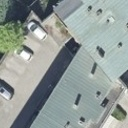

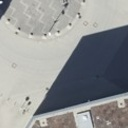

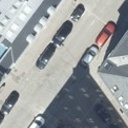

In [ ]:

for image_path in glob.glob(f'/content/drive/MyDrive/TestJune/project32024/trainTest/detections/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")